# SIO 173, Solutions to some of the homework problems

**Philipp Arndt**

All questions are worth 2 points. <br>
One bonus point for submitting your solutions as a Colab Notebook.

<font size='2pt'>
(To receive Colab bonus credit, you need to *make an effort* to use $\LaTeX$ syntax for mathematical derivations and Python/R for calculations where appropriate. If not everything ends up working out for you in Colab, that's totally fine! Just make sure to provide me with all the information that was asked for somewhere where I can access it.)</p>

---

## Instructions for submitting homework in Colab

<font size='2pt'>If you use the provided template in Google Colab, **make a copy in your own Google Drive** before starting to edit. (otherwise your changes will not be saved!)</font>

<font size='2pt'><font color='red'> Please do not use the direct image upload button at the top of text cells.</font> Unfortunately, this tends to break Colab when downloading notebooks. Instead, if including images, please use the methods outlined in the Canvas announcement.</font>

<font size='2pt'>For useful $\LaTeX$ commands and an introduction to basic calculations in python, please refer to the homework 1 template ([Colab](https://colab.research.google.com/drive/1YID4sXGg1F1xRweoLzL7-aogA9w_NN6M?usp=sharing) / [HTML](https://fliphilipp.github.io/files/notebooks/teaching-example-intro.html)).</font>

<font size='2pt'>To answer a question that asks you to calculate the value of a physical property, please proceed as following:</font>

1.   <font size='2pt'>State your assumptions (which concepts from class are you using, which variables do you assume to be constant, etc.)</font>
2.   <font size='2pt'>Based on these assumptions, derive a formula for calculating the desired result. Show your work by including all steps and explain what you are doing.</font>
3.   <font size='2pt'>Use this formula to calculate the result in a Python code snippet:</font>
     - <font size='2pt'>define all your variables and constants in appropriate units</font>
     - <font size='2pt'>plug these into your formula to calculate the result</font>
     - <font size='2pt'>print the result and specify units</font>
4.   <font size='2pt'>If needed, add any interpretation of your results.</font>

<font size='2pt'>When you have answered all the questions, make sure you put your name at the top of the notebook template, download it (`File → Download → Download .ipynb`) and submit through Canvas.</font>


---
# <font color='red'> Question 1 </font>
<font color='red'>Using our approximation for the saturation vapor pressure and the equation of state for water vapor, calculate the maximum amount of water vapor per unit volume that air can hold at</font>
- <font color='red'>(a) a surface pressure of $1000 \mathrm{\,hPa}$ and a temperature of $288\mathrm{\,K}$, and</font>
- <font color='red'>(b) a height of $10 \mathrm{\,km}$ and a temperature of $220 \mathrm{\,K}$.</font>

<font color='red'>Express your answers in $\mathrm{kg\,m}^{-3}$.</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.66$)</font>
- <font color='green'> **0.5 pts:** Used the correct formula for $e_s$. ($21 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Used IGL to get $\rho_v$. ($17 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Correct result for part a ($288\mathrm{\,K}$). ($17 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Correct result for part b ($220\mathrm{\,K}$). ($15 / 22$ students) </font>

Start with the assumptions:
- saturation vapor pressure: $e_s \approx Ae^{B T_C}$ where $T_C = T - 273 \mathrm{\,K}$ is temperature in °$\textrm{C}$ <br> (the simplified Clausius-Clapeyron Relation, from class)
- ideal gas law (for water vapor): $e = \rho_v R_v T$

At saturation, from the ideal gas law
\begin{align}
  \rho_v &= \frac{e_s}{R_v T} \\
  &= \frac{Ae^{B T_C}}{R_v T} \\
  &= \frac{Ae^{B (T-273 \mathrm{\,K})}}{R_v T},
\end{align}
where
- $R_v = 461 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific gas constant of water vapor),
- $A = 611 \mathrm{\,Pa}$,
- $B = 0.067 \mathrm{\,}^\circ\mathrm{C}^{-1}$ and
- $T$ is the given temperature.

Note that $\rho_v$ is only dependent on temperature $T$, so you can ignore the surface pressure of $1000 \mathrm{\,hPa}$ in part a, and the height of $10\mathrm{\,km}$ in part b.

Now, plug in the values below:

In [2]:
# imports
from IPython.display import display, Markdown
import numpy as np

# write function that solves the question
def get_rho_v(T):

  # the constants in standard SI units
  A = 611 # Pa (6.11 hPa)
  B = 0.067 # no units
  R_v = 461 # J kg^-1 K^-1 (specific gas constant for water vapor)

  # the equation
  rho_v = A*np.exp(B*(T-273)) / (R_v * T) # kg m^-3

  # print and return the result
  display(Markdown(r'**The maximum amount of water vapor per unit volume that air can hold at $%d \textrm{\,K}$ is $%.3g \textrm{\,kg m}^{-3}$.**' % (T, rho_v)))
  return rho_v

# part a
T = 288 # K
rho_v_a = get_rho_v(T)

# part b
T = 220 # K
rho_v_b = get_rho_v(T)

**The maximum amount of water vapor per unit volume that air can hold at $288 \textrm{\,K}$ is $0.0126 \textrm{\,kg m}^{-3}$.**

**The maximum amount of water vapor per unit volume that air can hold at $220 \textrm{\,K}$ is $0.000173 \textrm{\,kg m}^{-3}$.**

---
# <font color='red'> Question 2 </font>
<font color='red'> Consider an isothermal atmospheric column in hydrostatic balance. The temperature of the column is $263 \mathrm{\,K}$ and the surface pressure is $1000\mathrm{\,hPa}$.</font>
- <font color='red'> (a) Calculate the pressure and height that divide the atmosphere into two equal parts by mass.</font>
- <font color='red'> (b) Repeat the calculation for the level below which lies $90\textrm{%}$ of the atmospheric mass.</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.11$)</font>
- <font color='green'> **0.5 pts:** Showed that fraction of mass above $z = P(z)/P_\text{surface}$, or convincing reasoning. ($11 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Derived formula for $z$ as function of fraction of mass, or $P/P_\text{surface}$. ($17 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Correct values for $50\%$ mass. ($12 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Correct values for $90\%$ mass below. ($9 / 22$ students) </font>

Start with the assumptions:
- isothermal atmosphere, so $T = 263\textrm{K} = \textrm{constant}$
- hydrostatic balance: $\frac{\partial P}{\partial Z} = -\rho g$

We can write mass (per unit area) as a function of height $z$ as
\begin{align}
  M(z) &= \int_z^\infty \rho\ dz \\
  &= -\int_z^\infty\frac{dP}{g} \\
  &= \frac{P(z)}{g},
\end{align}
where in the last step we used the fact that the pressure at infinite height $z$ is $P(\infty) = 0$.
Since $g$ is constant, this means that $50\textrm{%}$ of the mass is above the height $z$ at which $P(z) = P_s / 2$ where $P_s$ is the surface pressure.
Similarly, $90\textrm{%}$ of the mass is below the height $z$ at which $P(z) = 0.1\,P_s$.

Now, since $P = P_s e^{-z/H}$ where $H$ is the scale height of the atmophere, we can solve for
\begin{align}
  z = -H \ln\left(\frac{P}{P_s}\right),
\end{align}
where we can calculate the scale height at temperature $T$ as in class:
\begin{align}
  H = \frac{R T}{g}.
\end{align}
Combining the last two equations yields
\begin{align}
  z = -\frac{R T}{g} \ln\left(\frac{P}{P_s}\right),
\end{align}
where
- $R = 287.05 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific gas constant of dry air),
- $g = 9.81 \mathrm{\,m\,s}^{-2}$ (gravitational acceleration on Earth),
- $T = 263 \mathrm{\,K}$ (temperature of the atmosphere) and
- $P/P_s$ is the fraction of mass that lies **above** $z$.

Now, plug in these values to get the answers.

In [1]:
# imports
from IPython.display import display, Markdown
import numpy as np

# function that caluculates the height below which a certain quantile of the mass of the atmosphere is located
def z_from_atmospheric_mass_percent(percentage, T=263, P_0=1000):

  # the constants in standard SI units
  R = 287 # J kg^-1 K^-1 (specific gas constant for dry air)
  g = 9.8 # m s^-2 (graviatational acceleration)

  # check that the percentage is in the right range
  if (percentage < 0) or (percentage >= 100):
    print('Please choose an appropriate percentage >= 0 and < 100.')
    return None

  # the equation
  else:
    z = -R * T / g * np.log(1-percentage/100) # m
    P = P_0 * (1 - percentage / 100)

    # print and return the result
    display(Markdown(r"**$%d$%% of the atmosphere's mass is below $%.0f \textrm{\,hPa}$, or $%.2f \textrm{\,km}$.**" % (percentage, P, z/1000)))
    return z

# part a
percentage = 50
z_a = z_from_atmospheric_mass_percent(percentage)

# part b
percentage = 90
z_b = z_from_atmospheric_mass_percent(percentage)

**$50$% of the atmosphere's mass is below $500 \textrm{\,hPa}$, or $5.34 \textrm{\,km}$.**

**$90$% of the atmosphere's mass is below $100 \textrm{\,hPa}$, or $17.73 \textrm{\,km}$.**

---
#  <font color='red'> Question 3 </font>
<font color='red'>(a) Use the hydrostatic relation to write down an expression for the dry adiabatic temperature lapse-rate as a function of pressure $(\Gamma_p = -dT/dp)$ rather than height. Estimate typical values for $\Gamma_p$ using numbers given in class. What is the key difference between the dry adiabatic lapse-rate as a function of pressure $(\Gamma_p)$ and as a function of height $(\Gamma_d)$?</font>

<font color='red'>(b) Compare the dry adiabatic lapse rate on Jupiter with that of Earth, given that its atmosphere is composed almost entirely of hydrogen. [Hint: you will have to look up the value of $c_p$ for hydrogen.]</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.10$)</font>
- <font color='green'> **0.5 pts:** Derived $\Gamma_p = -1/(\rho c_p)$; no points off for minus sign confusion. ($16 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Estimated at least one typical value for $\Gamma_p$; must be in $T/P$ units! ($7 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Key difference: $\Gamma_p$ cannot be considered constant with height; also accepted: different signs, dependent on density $\rho$. ($8 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Recognized that both $g$ and $c_p$ are different for Jupiter & plugged in; calculation for $\Gamma_p$ also accepted if using $R$ for hydrogen and units correct. ($13 / 20$ students) </font>

Assumptions / concepts:
- Hydrostatic balance: $\frac{dp}{dz} = -\rho g$
- Dry adiabatic temperature lapse-rate with respect to height: $\Gamma_d = -\frac{dT}{dz} = \frac{g}{c_p}$


## part a)
We can rewrite the hydrostatic balance as
\begin{align}
  \frac{dp}{dz} = -\rho g \iff \frac{dz}{dp} = -\frac{1}{\rho g}.
\end{align}
Now, re-write the dry adiabatic temperature lapse-rate with respect to height as
\begin{align}
  \Gamma_p = -\frac{dT}{dp} = - \frac{dT}{dz} \frac{dz}{dp}.
\end{align}
This allows us to plug in the above values for $dT/dz$ and $dz/dp$, which gives
\begin{align}
  \Gamma_p &= \frac{g}{c_{pd}} \frac{1}{-\rho g} \\
  &= -\frac{1}{\rho c_{pd}},
\end{align}
which we can also write (by using the Ideal Gas Law) as
\begin{align}
  \Gamma_p = -\frac{R_d T}{p c_{pd}}.
\end{align}

To calculate typical values for $\Gamma_p$ (say, at the surface and the scale height of the atmosphere) we can use the following estimates:
- $T_0 = 288 \mathrm{\,K}$ (mean surface temperature on Earth)
- $p_0 = 1013 \mathrm{\,hPa}$ (mean surface pressure on Earth)
- $R_d = 287.05 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific gas constant of dry air)
- $c_{pd} = 1005 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific heat of dry air at constant pressure)

and calculate a typical density of dry air at the surface using the ideal gas law: $\rho_0 = \frac{p_0}{R_d T_0}$ and similarly at the scale height $\rho_H = \frac{p_0}{e R_d T_0}$.


In [ ]:
# imports
import numpy as np
from IPython.display import display, Markdown

# constants / input values
T_0 = 288 # K
R_d = 287.05 # J kg^−1 K^−1
p_0 = 101300 # Pa
c_pd = 1005 # J kg^−1 K^−1

# calculations
rho_0 = p_0 / (R_d * T_0)
gamma_p0 = - 1 / (rho_0 * c_pd)
rho_H = p_0 / np.e / (R_d * T_0)
gamma_pH = - 1 / (rho_H * c_pd)

# print results
display(Markdown(r"**$\Gamma_p = %.3g\mathrm{\,°C/hPa}$ near the surface of the Earth, where $\rho_0 \approx %.3g \mathrm{\,kg\,m}^{-3}$.**" % (gamma_p0*100, rho_0)))
display(Markdown(r"**$\Gamma_p = %.3g\mathrm{\,°C/hPa}$ at the scale height $H$ of the atmosphere, where $\rho_H \approx %.3g \mathrm{\,kg\,m}^{-3}$.**" % (gamma_pH*100, rho_H)))

**$\Gamma_p = -0.0812\mathrm{\,°C/hPa}$ near the surface of the Earth, where $\rho_0 \approx 1.23 \mathrm{\,kg\,m}^{-3}$.**

**$\Gamma_p = -0.221\mathrm{\,°C/hPa}$ at the scale height $H$ of the atmosphere, where $\rho_H \approx 0.451 \mathrm{\,kg\,m}^{-3}$.**

The key difference is that the dry adiabatic lapse rate with respect to height $\Gamma_d = \frac{g}{c_{pd}}$ is composed of terms that we generally assume to be constant throughout the troposphere (although $c_p$ is technically the specific heat at constant pressure, and pressure varies with height). In contrast, $\Gamma_p = -\frac{1}{\rho c_{pd}}$ has a term of $\rho$, which varies considerably with pressure because air is compressible. Therefore, $\Gamma_d$ tends to be easier to work with, because it can be considered approximately constant throughout the troposphere.

## part b)
To calculate the adiabatic lapse rate $\Gamma_d = \frac{g}{c_p}$ we use the following values:
- gravitational acceleration on Earth: $g^\textrm{(earth)} = 9.81 \mathrm{\,m\,s}^{-2}$
- gravitational acceleration on Jupiter: $g^\textrm{(jupiter)} = 24.79 \mathrm{\,m\,s}^{-2}$
- specific heat of air at constant pressure and $T\approx 15$°$\mathrm{\,C}$: $c_p^\textrm{(dry air)} = 1.006 \mathrm{\,kJ\,kg}^{-1}\mathrm{\,K}^{-1}$
- specific heat of hydrogen at constant pressure and $T\approx -100$°$\mathrm{\,C}$: $c_p^\textrm{(hydrogen)} = 13.12 \mathrm{\,kJ\,kg}^{-1}\mathrm{\,K}^{-1}$

In [ ]:
# imports
from IPython.display import display, Markdown

# constants
g_earth = 9.81 # gravitational acceleration on Earth m s^-2
cp_air = 1006 # specific heat of air at constant pressure J kg^-1 K^-1
g_jupiter = 24.79 # gravitational acceleration on Jupiter m s^-2
cp_hydrogen = 13120 # specific heat of hydrogen at constant pressure J kg^-1 K^-1

# calculations
gamma_d_earth = g_earth / cp_air
gamma_d_jupiter = g_jupiter / cp_hydrogen

# print results (multiply by 1000 to get degree Celsius per kilometer)
display(Markdown(r"**$\Gamma_d = %.3g\mathrm{\,°C/km}$ on Earth.**" % (gamma_d_earth * 1000)))
display(Markdown(r"**$\Gamma_d = %.3g\mathrm{\,°C/km}$ on Jupiter.**" % (gamma_d_jupiter * 1000)))

**$\Gamma_d = 9.75\mathrm{\,°C/km}$ on Earth.**

**$\Gamma_d = 1.89\mathrm{\,°C/km}$ on Jupiter.**

---
#  <font color='red'> Question 4 </font>
<font color='red'>(a) Show that if the environmental lapse rate is dry adiabatic, it has constant potential temperature.</font>

<font color='red'>(b) Show that the buoyancy frequency can be written as:
\begin{align}
  N = \sqrt{\frac{g}{T_e}\left(\frac{dT_e}{dz} + \Gamma_d\right)},
\end{align}
where $\Gamma_d$ is the dry adiabatic lapse-rate.</font>

<font color='red'>(c) The First and Second Laws of Thermodynamics can be combined to get:
\begin{align}
  T\,dS = c_v\,dT + P\,dV
\end{align}
Using this equation, show that:
\begin{align}
  \left(\frac{dT}{dV}\right)\Biggr\rvert_S = -\left(\frac{dP}{dS}\right)\Biggr\rvert_V.
\end{align}
[Hint: You may assume the Ideal Gas Law to simplify the derivation.] This is an example of a **Maxwell Relation**, which allows us to substitute partial derivatives depending on which variables
are most convenient.</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.10$)</font>
- <font color='green'> **0.5 pts:** Made a somewhat reasonable attempt at all parts of the question; This was a long, difficult question! ($14 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Had the right approach / most steps to solve part a; minor mistakes okay, but need to explicitly use DRY adiabatic lapse rate. ($8 / 20$ students)</font>
- <font color='green'> **0.5 pts:** had the right approach / most steps to solve part b; minor mistakes okay, using what was asked for in part a okay. ($11 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Had the right approach / most steps to solve part c using ideal gas law or equality of mixed partials; minor mistakes okay. ($11 / 20$ students) </font>

## part 2a)
Concepts:
- Dry adiabatic lapse rate (DALR): $\Gamma_d = \frac{g}{c_{pd}}$
- Potential temperature (PT): $\theta = T\left(\frac{p_s}{p}\right)^\kappa$, where $\kappa \equiv \frac{R_d}{c_{pd}}$
- Hydrostatic balance (HB): $\frac{dp}{dz} = -\rho g$
- Ideal gas law (IGL): $P=\rho R_{d} T$

Assumption:
- Environmental lapse rate is equal to DALR: $-\frac{\partial T}{\partial z} = \Gamma_d$

Need to show:
- $\theta$ is constant, or $\frac{\partial \theta}{\partial z} = 0$

We can differentiate the potential temperature equation
\begin{align}
  d\theta &= dT \left(\frac{p_s}{p}\right)^\kappa + T d\left(\left(\frac{p_s}{p}\right)^\kappa\right)
  \quad\quad \text{(product rule)}\\
  &= dT \left(\frac{p_s}{p}\right)^\kappa + T\kappa \left(\frac{p_s}{p}\right)^{\kappa - 1} d\left(\frac{p_s}{p}\right)
  \quad\quad \text{(power / chain rules)}\\
  &= dT \left(\frac{p_s}{p}\right)^\kappa + T\kappa \left(\frac{p_s}{p}\right)^{\kappa - 1} \frac{-p_s\, dp}{p^2}
  \quad\quad \text{(quotient rule)}\\
  & = dT \left(\frac{p_s}{p}\right)^\kappa - T\kappa \left(\frac{p_s}{p}\right)^{\kappa - 1} \frac{p_s}{p} \frac{dp}{p} \\
  &= dT \left(\frac{p_s}{p}\right)^\kappa - \kappa\, dp \frac{T}{p}\left(\frac{p_s}{p}\right)^\kappa
\end{align}

Now, we can write
\begin{align}
  \frac{d\theta}{dz} &= \frac{dT}{dz} \left(\frac{p_s}{p}\right)^\kappa - \kappa\, \frac{dp}{dz} \frac{T}{p}\left(\frac{p_s}{p}\right)^\kappa \\
  &= \frac{dT}{dz} \frac{\theta}{T} - \kappa\, \frac{dp}{dz} \frac{T}{p}\frac{\theta}{T}
  \quad\quad \text{(PT)}\\
  &= -\frac{g}{c_{pd}} \frac{\theta}{T} + \kappa\, \rho g \frac{\theta}{p}
  \quad\quad \text{(DALR, HB)}\\
  &= -\frac{g}{c_{pd}} \frac{\theta}{T} + \kappa\,  g \frac{\theta}{R_d T}
  \quad\quad \text{(IGL)}\\
  &= -\frac{g}{c_{pd}} \frac{\theta}{T} + \,  \frac{g}{c_{pd}} \frac{\theta}{T}
  \quad\quad \text{(def. of }\kappa\text{)}\\
  &= 0
\end{align}
Since $\frac{d\theta}{dz} = 0$, potential temperature is constant.



## part 2b)
Concepts:
- Buoyancy frequency: $N^2 =g \frac{\partial \ln \theta}{\partial z}$
- Dry adiabatic lapse rate: $\Gamma_d = \frac{g}{c_{pd}}$

In part a), we showed that
\begin{align}
  \frac{d\theta}{dz}
  &= \frac{\theta}{T} \left(\frac{dT}{dz} + \frac{g}{c_{pd}}\right),
\end{align}
where here we do not assume a dry adiabatic lapse rate, so that $-\frac{dT}{dz} \neq \Gamma_d = \frac{g}{c_{pd}} $.

Multiply both sides by $g/\theta$ to obtain
\begin{align}
  \frac{g}{\theta} \frac{d\theta}{dz}
  = \frac{g}{T} \left(\frac{dT}{dz} + \Gamma_d\right).
\end{align}
The left side of this expression becomes
\begin{align}
\frac{g}{\theta} \frac{d\theta}{dz}
  = g \frac{d \ln \theta}{d z}
  = N^2.
\end{align}
Therefore,
\begin{align}
  N = \sqrt{\frac{g}{T} \left(\frac{dT}{dz} + \Gamma_d\right)},
\end{align}
with $T=T_e$.

## part 2c)
Concepts:
- Combination of 1st and 2nd law of thermodynamics: $T\,dS = c_v\,dT + P\,dV$
- Ideal gas law: $PV=RT$

When holding $S$ constant $dS=0$, so in this case $c_v\,dT = - P\, dV$, which we can write as
\begin{align}
  \frac{dT}{dV}\Biggr\rvert_S = -\frac{P}{c_v}
\end{align}

Similarly, when holding $V$ constant $dV=0$, so in this case $T\, dS =  c_v\,dT$, which we can write as
\begin{align}
  \frac{dP}{dS}\Biggr\rvert_V
  &= \frac{T}{c_v} \frac{dP}{dT}\Biggr\rvert_V
\end{align}

Now, to get $\frac{dP}{dT}\Big\rvert_V$, we can differentiate the ideal gas law.
\begin{align}
  PV = RT \implies P\, dV + V\,dP = R\,dT.
\end{align}
When holding $V$ constant $dV=0$, so in this case the differentiated ideal gas law
\begin{align}
  V\,dP = R\, dT \quad \quad (\textrm{at } V=\textrm{const}),
\end{align}
which we can rearrange to
\begin{align}
 \frac{dP}{dT}\Biggr\rvert_V = \frac{R}{V}.
\end{align}
Plugging this into the above,
\begin{align}
  \frac{dP}{dS}\Biggr\rvert_V
  &= \frac{RT}{c_vV} = \frac{P}{c_v}.
\end{align}

This means that
\begin{align}
  \frac{dT}{dV}\Biggr\rvert_S = -\frac{P}{c_v} = - \frac{dP}{dS}\Biggr\rvert_V.
\end{align}


## part 2c (not using ideal gas law)
Start with
\begin{align}
  T\, dS = dU + P\,dV.
\end{align}
When holding $V$ constant, $dV=0$, so in that case $T\, dS = dU$. This means that
\begin{align}
  \left(\frac{\partial U}{\partial S}\right)\Biggr\rvert_V = T.
\end{align}
We can differentiate both sides with respect to $V$ while holding $S$ constant to get
\begin{align}
  \left(\frac{\partial T}{\partial V}\right)\Biggr\rvert_S =
  \frac{\partial}{\partial V}\Biggr\rvert_S \left(\frac{\partial U}{\partial S}\right)\Biggr\rvert_V = \frac{\partial^2 U}{\partial V \partial S}.
\end{align}
Similarly, when holding $S$ constant $dS=0$, so in that case $dU = - P\, dV$. This means that
\begin{align}
  \left(\frac{\partial U}{\partial V}\right)\Biggr\rvert_S = -P.
\end{align}
We can differentiate both sides with respect to $S$ while holding $V$ constant to get
\begin{align}
  -\left(\frac{\partial P}{\partial S}\right)\Biggr\rvert_V =
  \frac{\partial}{\partial S}\Biggr\rvert_V \left(\frac{\partial U}{\partial V}\right)\Biggr\rvert_S = \frac{\partial^2 U}{\partial S \partial V}.
\end{align}
Due to the equality of mixed partials
\begin{align}
  \frac{\partial^2 U}{\partial S \partial V} = \frac{\partial^2 U}{\partial V \partial S},
\end{align}
we have
\begin{align}
  \left(\frac{\partial T}{\partial V}\right)\Biggr\rvert_S =
  -\left(\frac{\partial P}{\partial S}\right)\Biggr\rvert_V.
\end{align}

---
#  <font color='red'> Question 5 </font>

<font color='red'>(a) Consider an airplane flying in the upper troposphere, at a pressure of $200\mathrm{\,hPa}$. By how much does the environmental air, which is at a temperature of $220\mathrm{\,K}$, need to be cooled before it is pumped through the cabin at a comfortable temperature of $293\mathrm{\,K}$ and a pressure of $1000\mathrm{\,hPa}$?</font>

<font color='red'>(b) Calculate the equivalent potential temperature of an air parcel with a temperature of $280\mathrm{\,K}$, a pressure of $800\mathrm{\,hPa}$ and a specific humidity of $3\mathrm{\,g/kg}$. How does the equivalent potential temperature change if</font>
  - <font color='red'>(i) the parcel's temperature is warmed by $1\mathrm{\,K}$,</font>
  - <font color='red'>(ii) the parcel rises by $10\mathrm{\,hPa}$ (ignore adiabatic expansion), and</font>
  - <font color='red'>(iii) the parcel is moistened by $1\mathrm{\,g/kg}$?</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.48$)</font>
- <font color='green'> **0.5 pts:** Part a) realized that this can be plugged into the potential temperature ($\theta$) equation. ($15 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Part a) plugged in and got the correct $\Delta T$. ($12 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Part b) used the right equation and plugged in for initial value of $\theta_e$; minor mistakes in calcuation ok. ($18 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Part b) plugged in reasonable values for i-iii and got reasonable results. ($14 / 20$ students) </font>

Assumptions / concepts:
- Potential temperature: $\theta = T\left(\frac{p_s}{p}\right)^\kappa$, where $\kappa \equiv \frac{R_d}{c_{pd}} \approx \frac{2}{7}$.
- Equivalent potential temperature: $\theta_e = \theta \exp\left[\frac{L_v q}{c_{pd} T}\right]$

## part a)
Since the potential temperature tells us the temperature an air parcel would have if it were adiabatically brought to the pressure $p_s$, we can calculate the temperature that the outside air would have if it is brought to cabin pressure without any cooling as
\begin{align}
  \theta_\mathrm{outside} = T_\mathrm{outside}\left(\frac{p_\mathrm{cabin}}{p_\mathrm{outside}}\right)^\kappa,
\end{align}
where $p_\mathrm{cabin} = 1000\mathrm{\,hPa}$ is the cabin pressure, $T_\mathrm{outside}=220\mathrm{\,K}$ is the outside temperature and $p_\mathrm{outside} = 200\mathrm{\,hPa}$ is the outside pressure.
This means we can calculate the amount of cooling needed as
\begin{align}
  \Delta T = \theta_\mathrm{outside} - T_\mathrm{cabin} = T_\mathrm{outside}\left(\frac{p_\mathrm{cabin}}{p_\mathrm{outside}} \right)^\kappa - T_\mathrm{cabin},
\end{align}
where $T_\mathrm{cabin} = 293\mathrm{\,K}$ is the comfortable cabin temperature.

[*Note: Often, the cabin pressure in airplanes is $\approx 800 \mathrm{\,hPa}$, which makes the airplane lighter, allows for larger windows, and saves airlines some air conditioning money...*]

In [ ]:
# imports
from IPython.display import display, Markdown

# input variables
T_outside = 220 # Kelvin
T_cabin = 293 # Kelvin
p_cabin = 1000 # hPa
p_outside = 200 # hPa
kappa = 2 / 7 # R/c_p for dry air

# temperature conversion functions
def k2c(k):
  return k-273.15
def c2f(c):
  return (c * 9/5) + 32

# calculation
theta = T_outside * (p_cabin / p_outside) ** kappa
deltaT = theta - T_cabin

# print results (multiply by 1000 to get degree Celsius per kilometer)
Ts = (T_cabin, k2c(T_cabin), c2f(k2c(T_cabin)))
display(Markdown(r"The cabin temperature in the airplane is **$T_\textrm{cabin} = %.3g\mathrm{\,K} = %.3g\mathrm{\,°C} = %.3g\mathrm{\,°F}$.**" % Ts))
thetas = (theta, k2c(theta), c2f(k2c(theta)))
display(Markdown(r"The cabin temperature in the airplane without cooling would be **$\theta_\textrm{outside} = %.3g\mathrm{\,K} = %.3g\mathrm{\,°C} = %.3g\mathrm{\,°F}$.**" % thetas))
deltaTs = (deltaT, c2f(deltaT))
display(Markdown(r"The air would have to be cooled by **$\Delta T = %.3g\mathrm{\,°C} = %.3g\mathrm{\,°F}$.**" % deltaTs))

The cabin temperature in the airplane is **$T_\textrm{cabin} = 293\mathrm{\,K} = 19.9\mathrm{\,°C} = 67.7\mathrm{\,°F}$.**

The cabin temperature in the airplane without cooling would be **$\theta_\textrm{outside} = 348\mathrm{\,K} = 75.3\mathrm{\,°C} = 168\mathrm{\,°F}$.**

The air would have to be cooled by **$\Delta T = 55.4\mathrm{\,°C} = 132\mathrm{\,°F}$.**

## part b)
We can use equation for Equivalent Potential Temperature:
\begin{align}
  \theta_e = \theta \exp\left[\frac{L_v q}{c_{pd} T}\right] = T\left(\frac{p_s}{p}\right)^{\frac{R_d}{c_{pd}}} \exp\left[\frac{L_v q}{c_{pd} T}\right],
\end{align}
where
- $T = T_0 = 280 \mathrm{\,K}$ is the given temperature,
- $p = p_0 = 800 \mathrm{\,hPa}$ is the given environmental pressure,
- $q = q_0 = 3 \mathrm{\,g\,kg}^{-1}$ is the given water vapor mixing ratio,
- $p_s = 1000 \mathrm{\,hPa}$ is the surface pressure,
- $L_v = 2260 \mathrm{\,kJ\,kg}^{-1}$ is the latent heat of vaporization for water,
- $c_{pd} = 1006 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ is the specific heat at constant pressure for dry air and
- $R_d = 287 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ is the specific gas constant for dry air.

Plugging in the above values yields the initial equivalent potential temperature $\theta_e$ of the air parcel.

Now, for each part of the question, we need to adjust one of the values above, calculate the new $\theta_e$, and then subtract the initial $\theta_e$ to obtain the change in $\theta_e$.

- (i) The parcel's temperature is warmed by $1\mathrm{\,K}$.
<br>$\implies$ $T= T_0 + 1 \mathrm{\,K} = 281 \mathrm{\,K}$
- (ii) The parcel rises by $10\mathrm{\,hPa}$.
<br>$\implies$ $p = p_0 - 10 \mathrm{\,hPa} = 790 \mathrm{\,hPa}$
- (iii) The parcel is moistened by $1\mathrm{\,g/kg}$.
<br>$\implies$ $q = q_0 + 1\mathrm{\,g\,kg}^{-1} = 4 \mathrm{\,g\,kg}^{-1}$

In [ ]:
# imports
import numpy as np

# function for calculations
T0 = 280
p0 = 800
q0 = 3
def eq_pot_temp(T=T0, p=p0, q=q0, p_s=1000, c_pd=1006, R_d=287, L_v=2260):
  """Function that calculates equivalent potential temperature, with default values:
  - T = 280 K, given temperature
  - p = 800 hPa, given environmental pressure
  - q = 3 g / kg, given water vapor mixing ratio
  - ps = 1000 hPa, surface pressure
  - L = 2260 kJ / kg, latent heat of vaporization for water
  - cp = 1006 J / (kg K), specific heat at constant pressure for dry air
  - Rd = 287 J / (kg K), specific gas constant for dry air"""

  # or approx: (T + L_v * q / (c_pd)) * (p_s / p) ** (R_d / c_pd)
  return T * (p_s / p) ** (R_d / c_pd) * np.exp(L_v * q / (c_pd * T))

# calculate results
theta_e = eq_pot_temp()
theta_e1 = eq_pot_temp(T = T0 + 1)   # warmed by 1K
theta_e2 = eq_pot_temp(p = p0 - 10)  # RISES by 10 hPa
theta_e3 = eq_pot_temp(q = q0 + 1)   # moistened by 1 g/kg

# print results
display(Markdown(r"**The parcel's equivalent potential temperature is $\theta_e = %.2f\mathrm{\,K}$.**" % theta_e))
s = r"**If warmed by $1\mathrm{\,K}$, the parcel's equivalent potential temperature is $\theta_e = %.2f\mathrm{\,K}$. " % theta_e1
s += r"This is a change of $\Delta\theta_e = %.2f\mathrm{\,K}$**" % (theta_e1 - theta_e)
display(Markdown(s))

s = r"**If the parcel rises by $10\mathrm{\,hPa}$, its equivalent potential temperature is $\theta_e = %.2f\mathrm{\,K}$. " % theta_e2
s += r"This is a change of $\Delta\theta_e = %.2f\mathrm{\,K}$**" % (theta_e2 - theta_e)
display(Markdown(s))

s = r"**If the parcel is moistened by $1\mathrm{\,g/kg}$, its equivalent potential temperature is $\theta_e = %.2f\mathrm{\,K}$. " % theta_e3
s += r"This is a change of $\Delta\theta_e = %.2f\mathrm{\,K}$**" % (theta_e3 - theta_e)
display(Markdown(s))

**The parcel's equivalent potential temperature is $\theta_e = 305.67\mathrm{\,K}$.**

**If warmed by $1\mathrm{\,K}$, the parcel's equivalent potential temperature is $\theta_e = 306.74\mathrm{\,K}$. This is a change of $\Delta\theta_e = 1.07\mathrm{\,K}$**

**If the parcel rises by $10\mathrm{\,hPa}$, its equivalent potential temperature is $\theta_e = 306.77\mathrm{\,K}$. This is a change of $\Delta\theta_e = 1.10\mathrm{\,K}$**

**If the parcel is moistened by $1\mathrm{\,g/kg}$, its equivalent potential temperature is $\theta_e = 308.14\mathrm{\,K}$. This is a change of $\Delta\theta_e = 2.46\mathrm{\,K}$**

---
#  <font color='red'> Question 6 </font>
<font color='red'>Calculate the moist adiabatic lapse rate for saturated air every $100\mathrm{\,hPa}$ between $1000\mathrm{\,hPa}$ and $500\mathrm{\,hPa}$, starting from a surface temperature of $300\mathrm{\,K}$. Give your answer in units of $\mathrm{K/km}$.

<font color='red'>*Hints:*</font>
- <font color='red'>*(1) use hydrostatic balance to relate pressure and height, using a scale height of $8\mathrm{\,km}$;*</font>
- <font color='red'>*(2) remember that $T(z_2) = T(z_1) - \Gamma_m \Delta z$.*</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.05$)</font>
- <font color='green'> **0.5 pts:** Used correct equations for $\Gamma_m$, $q$, and $e_s$. ($13 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Generally described how one would solve this, even if execution failed. ($11 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Integrated both $T$ and $\Gamma_m$ (including $e_s$ and $q$) forward in the same loop. ($13 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Got reasonable values for $\Gamma_m$; some sign errors or a wrong constant or flipped numerical array o.k. if it's an easy fix. ($5 / 20$ students)</font>

Given a pressure $p$ and a temperature $T$, we can calculate
\begin{align}
  \Gamma_m = -\frac{dT}{dz}
  &= \Gamma_d \left[
    \frac{1 + L_v q_* / (R_d T)}{1+ \beta L_v q_* / c_{pd}}
    \right] \quad \text{(Eqn. 4-28)}\\
    &= \frac{g}{c_{pd}} \left[
    \frac{1 + L_v q_* / (R_d T)}{1+ \beta L_v q_* / c_{pd}}
    \right] \\
\end{align}
where
\begin{align}
  q_* = \frac{e_s/(R_v T)}{p / (R_dT)} = \frac{R_d}{R_v}\frac{e_s}{p}  \quad \text{(Eqn. 4-24)}
\end{align}
is the saturation-specific humidity and
\begin{align}
e_s = Ae^{\beta (T-273.15 \textrm{K})} \quad \text{(Eqn. 1-4)}
\end{align}
is the saturation water vapor pressure.

Since $\Gamma_m$ is a function of only pressure and temperature, this means we can calculate $\Gamma_m$ at the surface level, where $T = T_0 = 300 \mathrm{\,K}$ and $p = p_0 = 1000 \mathrm{\,hPa}$.

Now, we can calculate $z$ at the next pressure level $p=p_1$ using
\begin{align}
  p = p_s e^{-z/H} \iff z = - H \ln \left(\frac{p}{p_0}\right).
\end{align}

This allows us to calculate the temperature at this elevation by numerically integrating forward, using
\begin{align}
  T(z_1) = T(z_0) - \Gamma_m \Delta z.
\end{align}

We can now iteratively solve for $\Gamma_m$ at all pressure levels.






Assume (constants from the textbook)
- $g = 9.81 \mathrm{\,m\,s}^{-1}$ (gravitational acceleration on Earth)
- $R_d = 287.05 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific gas constant for dry air)
- $R_v = 461.39 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific gas constant for water vapor)
- $c_{pd} = 1005 \mathrm{\,J\,kg}^{-1}\mathrm{\,K}^{-1}$ (specific heat of dry air at constant pressure)
- $L_v = 2,260 \mathrm{\,kJ\,kg}^{-1}$ (latent heat of vaporization of water)
- $A = 6.11 \mathrm{\,hPa}$ (saturation water vapor pressure $e_s$ at $0$°$\mathrm{C}$)
- $\beta = 0.067$°$\mathrm{C}^{-1}$ (exponential scale factor for variations of $e_s$ with temperature in the simplified Calusius Clapeyron relationship)
- $p_s = 1013 \mathrm{\,hPa}$ (mean surface pressure on Earth)
- $H \approx 8 \mathrm{\,km}$ (approximate scale height of the Earth's atmosphere)
- $T_0 = 300 \mathrm{\,K}$ (the given surface temperature)


In [ ]:
import numpy as np
import pandas as pd


def calc_gamma_m(T, p, g=9.81, R_d=287.05, R_v=461.39, c_pd=1005, L_v=2260e3, A=611, beta=0.067, fromclass=True):

  e_s = A * np.exp(beta*(T-273.15))
  q = (R_d / R_v) * (e_s / p)

  if fromclass:
    # the equation from class / the book
    gamma_m = g / c_pd * (1 + L_v * q / (R_d * T)) / (1 + L_v * beta * q / c_pd)
  else:
    # alternative equation
    q = (R_d / R_v) * (e_s / (p - e_s))
    gamma_m = g * (1 + L_v * q / (R_d * T)) / (c_pd + L_v**2 * q / (R_v * T**2))

  return gamma_m, e_s, q


def iterate_gamma_values(p_start=100000, p_end=50000, p_step=-10000, T_0=300, H=8000, p_s=101300):

  # initialize arrays
  P = np.arange(p_start, p_end+p_step, p_step).astype(np.float64)
  T = np.zeros_like(P)
  z = np.zeros_like(P)
  gamma_m = np.zeros_like(P)
  e_s = np.zeros_like(P)
  q = np.zeros_like(P)

  # calculate initial values
  T[0] = T_0
  z[0] = - H * np.log(P[0]/p_s)
  gamma_m[0], e_s[0], q[0]  = calc_gamma_m(T=T[0], p=P[0])

  # solve iteratively
  for i,p in enumerate(P[1:]):
    z[i+1] = - H * np.log(p/p_s)
    T[i+1] = T[i] - gamma_m[i] * (z[i+1] - z[i])
    gamma_m[i+1], e_s[i+1], q[i+1] =  calc_gamma_m(T[i+1], p)

  # combine the results into a pandas dataframe
  df = pd.DataFrame({'P (hPa)': P/100,
                     'gamma_m (K/km)': gamma_m*1000,
                     'z (km)': z/1000,
                     'T (K)': T,
                     'T (Celsius)': T-273.15,
                     'e_s (hPa)': e_s/100,
                     'q (g/kg)': q*1000})

  # return the dataframe with all results
  return df


# calculate the results and display as dataframe
df = iterate_gamma_values()
df

,P (hPa),gamma_m (K/km),z (km),T (K),T (Celsius),e_s (hPa),q (g/kg)
0,1000.0,3.507174,0.103330,300.000000,26.850000,36.924555,22.972309
1,900.0,3.653290,0.946214,297.043859,23.893859,30.289930,20.938479
2,800.0,3.838875,1.888478,293.601494,20.451494,24.051007,18.703920
3,700.0,4.082641,2.956729,289.500611,16.350611,18.272875,16.240456
4,600.0,4.416487,4.189935,284.465875,11.315875,13.040898,13.522146
5,500.0,4.897664,5.648507,278.024109,4.874109,8.469674,10.538677


## Plot for Question 4
(not asked for, but helpful to understand what is going on)

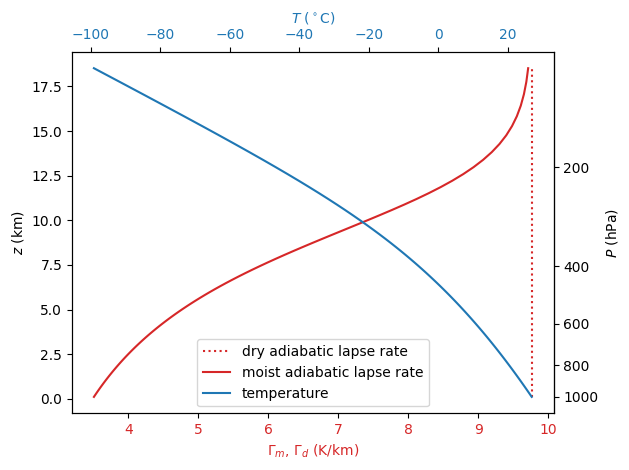

In [ ]:
# imports
import matplotlib.pyplot as plt

# set constants
p_s = 101300
H = 8000

# use the function defined before to solve for the variables of interest
df = iterate_gamma_values(p_start=100000, p_end=10000, p_step=-1000, T_0=300, H=H, p_s=p_s)

# create the figure
fig, ax = plt.subplots()

# plot Gamma_m vs. z
color = 'tab:red'
plot_gamma_m, = ax.plot(df['gamma_m (K/km)'], df['z (km)'], color=color, label='moist adiabatic lapse rate')
ax.set_xlabel('$\Gamma_m$, $\Gamma_d$ (K/km)', color=color)
ax.tick_params(axis='x', labelcolor=color)
ax.set_ylabel('$z$ (km)')

g=9.81
c_pd=1005
gamma_d = g/c_pd * 1000
plot_gamma_d, = ax.plot([gamma_d]*2, [df['z (km)'].min(),df['z (km)'].max()], ls=':', color=color, label='dry adiabatic lapse rate')

# add a second x-axis to plot temperature too
ax2 = ax.twiny()
color = 'tab:blue'
plot_T, = ax2.plot(df['T (Celsius)'], df['z (km)'], color=color, label='temperature')
ax2.set_xlabel('$T$ ($^\circ$C)', color=color)
ax2.tick_params(axis='x', labelcolor=color)

# ad a second y-axis to plot elevation
def p2z(p):
    return - H * np.log(np.clip(p*100/p_s, 1e-15, None)) / 1000
def z2p(z):
    return p_s * np.exp(-z*1000/H) / 100
secax = ax.secondary_yaxis('right', functions=(z2p, p2z))
secax.set_ylabel('$P$ (hPa)')

# add legend for readability
ax.legend(handles=[plot_gamma_d, plot_gamma_m, plot_T], loc='lower center')

fig.tight_layout()

---
# <font color='red'> Question 7 </font>
<font color='red'>In class we compared Ava's day at the beach with Ben's drive to LA. If Los Angeles is always $2\,$°$\textrm{C}$ colder than San Diego and Ben drives at a constant speed of $100\,\textrm{km/hour}$, what is the rate of temperature change he experiences over the course of the day (in °$\textrm{C/h}$)?</font>



## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.27$)</font>
- <font color='green'> **0.5 pts:** Correct general formula for $DT/Dt = dT/dt + v\, dT/dy$. ($18 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Correct expression for $dT/dt$; from class and same as SD because LA is *always* $2^\circ\mathrm{C}$ colder than SD. ($15 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Correct result for $v\,dT/dy$; about $-1.1 ^\circ\mathrm{C\,h}^{-1}$; implicit in code o.k. ($20 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Correct final result for $DT/Dt$ as a function of time $t$; "While driving" o.k.; $t=1.8$ hrs or similar not acceptabe because it asks for "over the course of the day", not "at 1:48 am, if driving at that time". ($3 / 22$ students) </font>

The distance from San Diego to LA is $\Delta y \approx 180\,\textrm{km}$ (assuming line of flight) and the temperature difference is $\Delta T = -2\,$°$\textrm{C}$, so assuming a constant temperature gradient,
\begin{align}
  \frac{\partial T}{\partial y} = \frac{\Delta T}{\Delta y}.
\end{align}
From class, we also have
\begin{align}
\frac{\partial T}{\partial t} = B\sin\left(2\pi \frac{t}{24\,\textrm{hrs}}\right)
\end{align}
where $B = \frac{2\pi\times 5\,^\circ\textrm{C}}{24\,\textrm{hrs}}$.
\begin{align}
  \frac{\partial T}{\partial t} = \frac{5\pi}{12} \sin \left( \frac{2\pi t}{24\,\textrm{h}} \right).
\end{align}
Since
\begin{align}
  \frac{D T}{D t} = \frac{\partial T}{\partial t} + v \frac{\partial T}{\partial y},
\end{align}
the temperature change that Ben experiences over the course of the day is
\begin{align}
  \frac{D T}{D t} = \frac{5\pi}{12} \sin \left( \frac{\pi t}{12} \right) + v \frac{\Delta T}{\Delta y}.
\end{align}

Plugging in
- $v = 100\,\textrm{km/h}$
- $\Delta y = 180\,\textrm{km}$
- $\Delta T = -2\,^\circ\textrm{C}$

yields
\begin{align}
  \frac{D T}{D t} = \left[\frac{5\pi}{12} \sin \left( \frac{\pi t}{12} \right) - 1.11 \right]\frac{^\circ\textrm{C}}{\textrm{h}}
\end{align}
during Ben's drive.

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# use latex in figures
# plt.rcParams['text.usetex'] = True

# given/assumed parameters
v = 100  # km / h
delta_y = 180  # km
delta_T = -2  # degrees C

# caculate advection term
advection = v * delta_T / delta_y  # celsius / hr

# print result
display(Markdown(r"**The advection term is $v \frac{\Delta T}{\Delta y} = %.3g \frac{^\circ\textrm{C}}{\textrm{h}}$.**" % advection))

**The advection term is $v \frac{\Delta T}{\Delta y} = -1.11 \frac{^\circ\textrm{C}}{\textrm{h}}$.**

Now, let's make a plot of this. (not asked for, but helpful!)

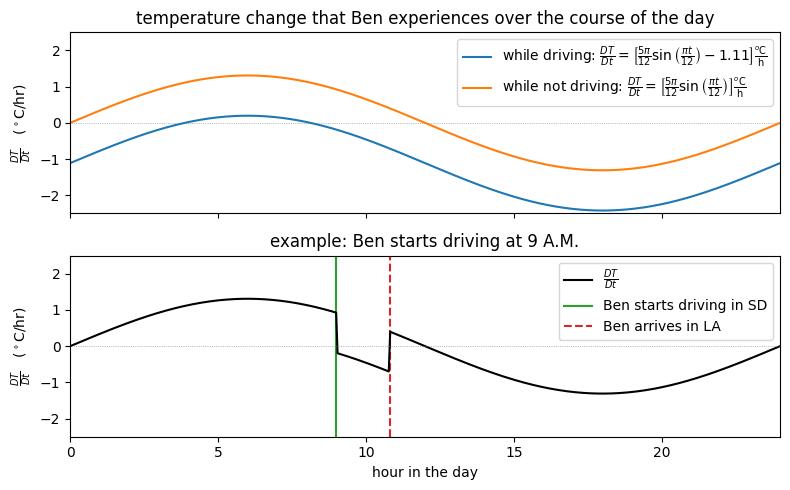

In [4]:
# data for plot
t = np.linspace(0, 24, 500)  # in hours
DTDt_driving = 5 * np.pi / 12 * np.sin(np.pi * t / 12) + advection  # celsius / hr
DTDt_notdriving = 5 * np.pi / 12 * np.sin(np.pi * t / 12)  # celsius / hr

# assuming he starts driving at t_start
t_start = 9  # hour in the day
t_end = t_start + delta_y / v
is_driving = (t >= t_start) & (t <= t_end)
DTDt_example_start = 5 * np.pi / 12 * np.sin(np.pi * t / 12) + is_driving * advection

# make a figure
fig, axs = plt.subplots(figsize=[8,5], nrows=2, sharex=True, sharey=True)

ax = axs[0]
ax.plot(t, t*0, color='gray', ls=':', lw=0.5)
whiledriving, = ax.plot(t, DTDt_driving, label=r'while driving: $\frac{D T}{D t} = \left[\frac{5\pi}{12} \sin \left( \frac{\pi t}{12} \right) - 1.11 \right]\frac{^o\mathrm{C}}{\mathrm{h}}$')
notdriving, = ax.plot(t, DTDt_notdriving, label=r'while not driving: $\frac{D T}{D t} = \left[\frac{5\pi}{12} \sin \left( \frac{\pi t}{12} \right)\right]\frac{^o\mathrm{C}}{\mathrm{h}}$')
ax.set_ylabel(r'$\frac{DT}{Dt}\quad (^\circ\mathrm{C} / \mathrm{hr})$')
ax.legend(loc='upper right')
ax.set_title('temperature change that Ben experiences over the course of the day')

ax = axs[1]
drivestart, = ax.plot([t_start]*2, [-2.5,2.5], color='C2', label='Ben starts driving in SD')
driveend, = ax.plot([t_end]*2, [-2.5,2.5], color='C3', ls='--', label='Ben arrives in LA')
DTDtplot, = ax.plot(t, DTDt_example_start, 'k-', label=r'$\frac{DT}{Dt}$')
ax.plot(t, t*0, color='gray', ls=':', lw=0.5)
ax.set_xlabel('hour in the day')
ax.set_ylabel(r'$\frac{DT}{Dt}\quad (^\circ\mathrm{C} / \mathrm{hr})$')
time_12hrformat = t_start if t_start <= 12 else t_start - 12
time_am_pm = 'A.M.' if (t_start < 12) | (t_start == 24) else 'P.M.'
ax.set_title('example: Ben starts driving at %g %s' % (time_12hrformat, time_am_pm))
ax.set_xlim(0,24)
ax.set_ylim(-2.5, 2.5)
ax.legend(handles=[DTDtplot, drivestart, driveend], loc='upper right')
fig.tight_layout()

---
# <font color='red'> Question 8 </font>
-  <font color='red'> **Part a)**
How large would Earth have to be for the centrifugal force at the Equator to equal $10\,\textrm{%}$ of the gravitational force? Assume Earth has the same mass and angular velocity. What types of planets favor larger ratios of the centrifugal force to the gravitational force?</font>
-  <font color='red'> **Part b)**
If you throw a baseball a horizontal distance of $100\,\textrm{m}$ in San Diego (latitude $33\,$°$\textrm{N}$) in $4\,\textrm{s}$, how
far is the ball deflected laterally as a result of Earth's rotation? (Hint: take the ball's motion to be initially due East and assume a constant value of $u$).</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.23$)</font>
- <font color='green'> **0.5 pts:** Part a: correct set-up for $F_c=0.1\,F_g$ and reasonable result for $r$ in meters, km, miles or as a ratio of Earth's radius. ($14 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Part a: logic reasoning which planet favor larger ratio (fast rotation, low density); large radius o.k. IF explicitly stating at same mass, otherwise low radius o.k. assuming same density; large gas planets ok. ($10 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Part b: correct formula for $dv/dt$ with right values for $f$ and $u=Δx/Δt$. ($16 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Part b: correct formula for displacement from $dv/dt$ and reasonable result ($~ -1.5 \mathrm{\,cm}$, i.e. deflected south); sign errors okay here because question technically just asks "how far". ($14 / 22$ students) </font>

### Part a)
We have
- $F_c = m \Omega^2 r$ (centrifugal force)
- $F_g = \frac{G m M}{r^2}$ (gravitational force)

We want
\begin{align}
  F_c = 0.1 F_g
\end{align}
and solving for $r$ yields
\begin{align}
  r = \sqrt[3]{\frac{0.1 G M}{\Omega^2}}.
\end{align}
We can now plug in the values.

In [5]:
# imports
import numpy as np
from IPython.display import display, Markdown

# parameters
G = 6.674e-11 # N m^2 / kg^2
M = 5.972e24
Omega = 2*np.pi/(24*60*60)  # s^-1
R_e = 6371e3

# calculate the result
r = (0.1 * G * M / Omega**2)**(1/3)

# print the result
display(Markdown(r"**The radius would have to be $%.0f\,\textrm{km}$, or $%.2g$ times as large as the Earth is.**" % (r/1e3, r/R_e)))

**The radius would have to be $19606\,\textrm{km}$, or $3.1$ times as large as the Earth is.**

In general,
\begin{align}
  \frac{F_c}{F_g} =\frac{\Omega^2 r^2}{G M}.
\end{align}
Since it is unrealistic to assume that the mass would stay the same as the planet becomes bigger, let's assume constant density, so
\begin{align}
  M = \frac{4}{3} \pi r^3 \rho.
\end{align}
Therefore,
\begin{align}
  \frac{F_c}{F_g} =\frac{3}{4 \pi G}\frac{\Omega^2}{\rho r}.
\end{align}
This means that the types of planets that favor larger ratios of centrifugal force to gravitational force are the ones that rotate fast, are small, and have a low density.

### Part b)
Since we are in the northern hemisphere the ball is deflected to the right. So if the ball is thrown to the east, then it is deflected to the south.

Let
- $\Delta x = 100\,\textrm{m}$
- $t = 4\,\textrm{s}$
- $\varphi = 33\,^\circ\textrm{N}$

We have
\begin{equation}
  \frac{\partial v}{\partial t} = - f u,
\end{equation}
where $u = \frac{\Delta x}{t}$ and $f=2\Omega\sin\left(\frac{2\pi\varphi}{360^\circ}\right)$.

Now
\begin{align}
  \Delta y &= \frac{1}{2}\frac{\partial v}{\partial t}t^2 \\
  &=-\frac{1}{2} f u t^2 \\
  &=-\Omega \Delta x t\sin\left(\frac{\pi\varphi}{180^\circ}\right),
\end{align}
and we can plug in the values.

In [6]:
# imports
import numpy as np
from IPython.display import display, Markdown

# given parameters
Omega = 2 * np.pi / (24*60*60)  # s^-1
delta_x = 100  # m, positive because towards east
t = 4  # s
phi = 33  # degrees

# calculate the result
delta_y = - Omega * delta_x * t * np.sin(np.pi * phi / 180)

# print the result
display(Markdown(r"**The ball is deflected by $%.3g\,\textrm{cm}$ (to the south).**" % (delta_y*100)))

**The ball is deflected by $-1.58\,\textrm{cm}$ (to the south).**

---
# <font color='red'> Question 9 </font>
<font color='red'>Is there any place on Earth where the atmosphere's horizontal flow can be the result of an exact balance between friction and the pressure gradient force? Justify your answer. </font>


## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $0.75$)</font>
- <font color='green'> **0.5 pts:** Mentions that only friction, pgf and coriolis important for horizontal flow. ($15 / 22$ students) </font>
- <font color='green'> **0.5 pts:** Realized that coriolis needs to be zero for exact balance between pgf and friction. ($5 / 22$ students)</font>
- <font color='green'> **0.5 pts:** Yes there is a place, with good attempt to justify; answers that say balance between friction and pressure gradient is geostrophic or achieved where friction is negligible were NOT accepted because this is the opposite of the correct answer. ($8 / 22$ students)</font>
- <font color='green'> **0.5 pts:** At the equator because there $f=0$. ($5 / 22$ students) </font>

The gravitational force and centrifugal force only act in $z$-direction, so only directly affect vertical flow. This means that for horizontal flow (in $x$ and $y$ directions) in the atmosphere, the relevant forces are friction, the pressure gradient force (PGF), and the coriolis force.

This means to achieve an **exact** balance between friction and the pressure gradient force, the coriolis force needs to be exactly zero. Since horizontal *flow* means that either $u$ or $v$ is nonzero, the coriolis force can only be zero in horizontal flow when $f=0$.

At the equator and only at the equator $f=0$, so the equator is the only possible place for a horizontal flow that is in exact balance between friction and pressure gradient force.

---
# <font color='red'> Question 10 </font>
<font color='red'>The winter polar stratosphere is dominated by the “polar vortex”, a strong westerly circulation at about $60\,^\circ$ latitude around the cold pole. Assuming that the temperature at the pole is (at all heights) $50\mathrm{\,K}$ colder at  $80\,^\circ$ latitude than at  $40\,^\circ$ latitude, that temperature varies uniformly in between these latitudes, and that the westerly wind speed at $100\mathrm{\,hPa}$ pressure and  $60\,^\circ$ latitude is $10 \mathrm{\,m\,s}^{-1}$, use the thermal wind relation to estimate the wind speed at $1 \mathrm{\,hPa}$ pressure and  $60\,^\circ$ latitude.</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.53$)</font>
- <font color='green'> **0.5 pts:** Solved the thermal wind relation for $du$. ($13 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Showed $du$ dependence on $\ln(p)$, and discretized formula for $du$ or explicitly took integral over $du$. ($15 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Correct derivation of $dT/dy$ using earth's radius, etc.; using $1^\circ\mathrm{lat} = 111\mathrm{\,km}$ o.k. ($17 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Plugged in correct values and got correct result ($~128 \mathrm{\,m \,s}^{-1}$). ($13 / 19$ students) </font>

Concepts / constants to use:
- Thermal wind relation: $f \frac{\partial u}{\partial p} = -\frac{R}{p}\frac{\partial T}{\partial y}$
- Radius of the Earth $R_E = 6,371\mathrm{\,km}$

Let $p_1 = 100\mathrm{\,hPa}$ and $p_2 = 1\mathrm{\,hPa}$ and $u_1 = 10 \mathrm{\,m\,s}^{-1}$ be the wind speed at $p_1$ at latitude $\varphi = 60\,^\circ$.
Let $\Delta u = u_2 - u_1$, where $p_2$ is the corresponding wind speed at $p_2$.
Let $\varphi_1 = 40\,^\circ$ and $\varphi_2 = 80\,^\circ$ and $\Delta T = - 50\mathrm{\,K}$ the temperature difference between  $\varphi_1$ and $\varphi_2$.

We can re-write the thermal wind relation as
\begin{align}
  du &= \frac{R}{f p}\frac{\partial T}{\partial y}\, dp \\
  &= \frac{R}{f} \frac{\partial T}{\partial y}\, \ln dp.
\end{align}
Since we assume uniformly varying temperature and since we know that $\ln p$ is linear, we can discretize:
\begin{align}
  \Delta u &= \frac{R}{f} \frac{\Delta T}{\Delta y}\, \Delta ( \ln p )
\end{align}
and substitute in the relevant variables
\begin{align}
  u_2 - u_1 &= \frac{R}{2 \Omega \sin(\varphi)} \frac{\Delta T}{R_E (\varphi_2 - \varphi_1)} (\ln p_2 - \ln p_1).
\end{align}
Thus
\begin{align}
  u_2 = u_1 + \frac{R}{2 \Omega \sin(\varphi)} \frac{\Delta T}{R_E (\varphi_2 - \varphi_1)}\, (\ln p_2 - \ln p_1).
\end{align}

In [7]:
# imports
from IPython.display import display, Markdown
import numpy as np

# specify variables
Omega =  7.2921e-5
R = 287  # J / (kg K)
R_E = 6371e3  # m
phi = 60  # degrees, latitude at which we want to calculate the wind speed
deltaT = -50  # K
phi_1 = 40  # degrees
phi_2 = 80  # degrees
p_2 = 100  # Pa
p_1 = 10000  # Pa
u_1 = 10  # m / s

# do the calculation
f = 2 * Omega * np.sin(np.deg2rad(phi))  # 1 / s
delta_y = R_E * (np.deg2rad(phi_2 - phi_1))
u_2 = u_1 + R/f * deltaT/delta_y * (np.log(p_2) - np.log(p_1))

# print the result
Markdown(r'**The wind speed at $p_2 = %g\mathrm{\,hPa}$ is $u_2 = %.3g \mathrm{\,m\,s}^{-1} \approx %.3g \mathrm{\,mph}$.**' % (p_2/100, u_2, u_2 * 2.23694))

**The wind speed at $p_2 = 1\mathrm{\,hPa}$ is $u_2 = 128 \mathrm{\,m\,s}^{-1} \approx 286 \mathrm{\,mph}$.**

---
# <font color='red'> Question 11 </font>

### <font color='red'>Part a)</font>
<font color='red'>How would Earth's emission temperature change if</font>
1. <font color='red'>the albedo was decreased to $0.1$ (all else held fixed), and</font>
2. <font color='red'>if the emissivity was increased by $50\,\%$?</font>

### <font color='red'>Part b)</font>
<font color='red'>Enceladus is the sixth-largest moon of Saturn. It has a thin, icy crust, which covers a subsurface ocean of liquid water, which some scientists speculate harbors the basic ingredients needed for life to emerge. This subsurface ocean is kept warm by strong tidal heating due to Enceladus' eccentric orbit around Saturn. In this question we will think about how the tidal heating modified Enceladus' energy balance. First, look up a value for the distance between Saturn and the Sun, then estimate the solar constant at Saturn's distance from the Sun. Use this value to estimate Enceladus' emission temperature, assuming a high albedo of 0.8 (because of its icy surface). Now, modify your expression
for Enceladus' energy balance to account for the additional internal heat source from tidal forces. Given an estimated tidal heat flux of $0.1 \mathrm{\,W\,m}^{-2}$, what is Enceladus' emission temperature? (Assume the moon is in equilibrium.)</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.29$)</font>
- <font color='green'> **0.5 pts:** Part a: got reference $T_e$ from class or used formula to get $T_e$ for reference albedo ($~0.3$) and new albedo ($0.1$) $→$ $T_e$ increases by $~16\mathrm{\,K}$ / to $271\mathrm{\,K}$ / $-2^\circ\mathrm{C}$. ($13 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Part a: realized that $T_e$ does not depend on emissivity. ($11 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Part b: got a good value for solar constant saturn (about $15 \mathrm{\,W\,m}^{-2}$) or got reasonable $T_e$; about $60 \mathrm{\,K}$. ($14 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Part b: equated $Q_\text{out}$ with $Q_\text{in}+Q_\text{tidal}$, got a reasonable difference in $T_e$; about $2\mathrm{\,K}$ warmer. ($11 / 19$ students) </font>

### Part a)

The **"emission temperature"** of a planet is the temperature of a black body that would emit the same total amount of electromagnetic radiation as the planet in question. It is often also referred to as "effective temperature" or "blackbody temperature", and the lecture notes refer to it as "radiation temperature".

From class, since $Q_\text{in} = Q_\text{out}$, we have
\begin{align}
  \frac{S}{4} \times (1 - \alpha) &= \epsilon \sigma T^4,
\end{align}
where
- $S = \frac{L}{4\pi r_E^2} \approx 1360 \mathrm{\,W\,m}^{-2}$ is the solar constant,
- $\sigma = 5.67 \times 10^{-8}\mathrm{\,W\,m}^{-2}\mathrm{\,K}^{-4}$ is the Stefan-Boltzmann constant,
- $\alpha \approx 0.3$ is the Earth's albedo
- $\epsilon$ is the emissivity
- $T$ is the temperature

For the *emission temperature* $T_e$, we have $\epsilon = 1$ since we are considering a blackbody radiator.

Solving for $T_e$ yields
\begin{align}
  T_e &= \left(\frac{S \times (1 - \alpha)}{4\sigma} \right)^{1/4}.
\end{align}

Now, we can plug in the appropriate values:
1. If the albedo were reduced to 0.1: This means we plug in $\alpha = 0.1$ while keeping all other parameters constant, which means **$T_e$ increases when the albedo is reduced.**
2. If the emissivity was increased by $50\,\%$: The *emission temperature* is independent of the actual emissivity $\epsilon$ since it is simply the temperature that a black body (with $\epsilon = 1$, by definition) *would* have in order to emit the total amount of observed radiation. Effective temperature is often used as an estimate of a body's surface temperature when the body's emissivity is not known. This means that **$T_e$ does not change when emissivity changes.**

In [10]:
# imports
from IPython.display import display, Markdown
import numpy as np

# specify constants
S = 1360.  #Solar constant
sigma = 5.67e-8  #Stefan-Boltzmann constant

# function to calculate emission temperature
def T_e(alpha=0.3, S=S, epsilon=0.8, sigma=sigma):
  epsilon_blackbody = 1.0  # just to make it clear that T_e is NOT dependent on epsilon...
  T = (S * (1 - alpha) / (4 * epsilon_blackbody * sigma)) ** (1 / 4)
  display(Markdown(r'**The emission temperature is $%.0f ^\circ\mathrm{C}$ (or $%.0f \mathrm{\,K}$) for $\alpha=%g$ and $\epsilon=%g$.**' % (T-273.15, T, alpha, epsilon)))
  return T

T_e()
T_e(alpha=0.1)  # lower the albedo (should get warmer!)
T_e(epsilon=1.5);  # increase the emissivity by 50 % (doesn't really make sense since we started with 1.0)

**The emission temperature is $-19 ^\circ\mathrm{C}$ (or $255 \mathrm{\,K}$) for $\alpha=0.3$ and $\epsilon=0.8$.**

**The emission temperature is $-2 ^\circ\mathrm{C}$ (or $271 \mathrm{\,K}$) for $\alpha=0.1$ and $\epsilon=0.8$.**

**The emission temperature is $-19 ^\circ\mathrm{C}$ (or $255 \mathrm{\,K}$) for $\alpha=0.3$ and $\epsilon=1.5$.**

### Part b)

- solar luminosity $L = 3.83 \times 10^{26}\mathrm{\,W}$
- distance between Saturn and the Sun: $r_\text{Sat} = 1.4495\text{ billion km}$

This means that the solar constant at Saturn's distance from the sun is about
\begin{align}
  S_\text{Sat} = \frac{L}{4\pi r_\text{Sat}^2} \approx 14.5 \mathrm{\,W\,m}^{-2}.
\end{align}

We can now calculate the surface temperature (assuming no atmosphere or tidal heat flux) using the same equation that we used in part a):
\begin{align}
  T_e &= \left(\frac{S \times (1 - \alpha)}{4\sigma} \right)^{1/4} \approx -213 ^\circ\mathrm{C}.
\end{align}

Now, let the tidal heat flux $Q_\text{tidal} = 0.1 \mathrm{\,W\,m}^{-2}$.
This means we have
\begin{align}
  Q_\text{out} = Q_\text{in} + Q_\text{tidal}
\end{align}
and therefore
\begin{align}
  T_e &= \left(\frac{Q_\text{in} + Q_\text{tidal}}{4\sigma} \right)^{1/4}\\
  &= \left(\frac{\frac{S_\text{Sat}}{4} (1 - \alpha) + Q_\text{tidal}}{\sigma} \right)^{1/4} \approx -211 ^\circ\mathrm{C}.
\end{align}



In [11]:
# imports
from IPython.display import display, Markdown
import numpy as np

# specify constants and parameters
sigma = 5.67e-8  #Stefan-Boltzmann constant
L = 3.83e26  # W, solar luminosity
r_sat = 1.4495e12  # m, distance of Saturn from the sun
alpha = 0.8  # albedo
tidal_heating = 0.1  # W / m^2

# calculate solar constant
S_sat = L / (4 * np.pi * r_sat ** 2)  # W / m^2, solar constant at Saturns distance from the Sun
display(Markdown(r"**The solar constant at Saturn's distance from the Sun is $%.4g \mathrm{\,W\,m}^{-2}$.**" % S_sat))

# function to calculate emission temperature
def T_e(alpha=0.3, tidal_heating=0.0, epsilon=1, S=S, sigma=sigma):
  T = ((S / 4 * (1 - alpha) + tidal_heating) / sigma) ** (1 / 4)
  display(Markdown(r'**The emission temperature is $%.0f ^\circ\mathrm{C}$ (or $%.0f \mathrm{\,K}$) for $Q_\text{tidal}=%g \mathrm{\,W\,m}^{-2}$.**' % (T-273.15, T, tidal_heating)))
  return T

# calcuate without tidal heating
T_0 = T_e(alpha=alpha, tidal_heating=0, S=S_sat)

# add tidal heating
T_tidalheating =  T_e(alpha=alpha, tidal_heating=tidal_heating, S=S_sat);

display(Markdown(r'**Tidal heating increases the temperature by about $%.2f^\circ\mathrm{C}$.**' % (T_tidalheating - T_0)))

**The solar constant at Saturn's distance from the Sun is $14.51 \mathrm{\,W\,m}^{-2}$.**

**The emission temperature is $-213 ^\circ\mathrm{C}$ (or $60 \mathrm{\,K}$) for $Q_\text{tidal}=0 \mathrm{\,W\,m}^{-2}$.**

**The emission temperature is $-211 ^\circ\mathrm{C}$ (or $62 \mathrm{\,K}$) for $Q_\text{tidal}=0.1 \mathrm{\,W\,m}^{-2}$.**

**Tidal heating increases the temperature by about $1.96^\circ\mathrm{C}$.**

---
# <font color='red'> Question 12 </font>
<font color='red'>In this problem we will modify the Plotting Session 2 notebook to compare the true zonal-mean
zonal winds $(u)$ and the geostrophic winds $(u_g)$. To do this, we will have to download geopotential height (since the data are on pressure levels) and calculate the gradient:</font>
1. <font color='red'>Open a new code cell in the notebook and copy-paste the code in the cell where we loaded the zonal wind files (`df_ua = df.query`) into the new cell. Replace ”ua” with ”zg” (i.e., change `df_ua` to `df_zg` and variable `id == 'ua'` to variable `id == 'zg'`).</font>
2. <font color='red'>Now load the data by making another cell and copying the code in the cell where we loaded the actual data (`zstore = ...`). You'll want to re-name the variables again (e.g., change `ds4` to `ds5`). Make sure you are loading the geopotential data and not the winds.</font>
3. <font color='red'>Finally, plot the geostrophic wind. First, convert latitude to units of radians. Then define the Coriolis parameter as a function of latitude. Then calculate the $y$-coordinate in meters from latitue and take the derivative of the geopotential height `ds5.zg[0]` (0 for January 1850) with respect to $y$. Finally, calculate the geostrophic wind from $\partial z_g / \partial y$ and $f$, using the same code we used to plot the zonal-mean winds.</font>
4. <font color='red'>This plot is for January 1850. Make another plot for the climatological geostrophic winds by changing `ds5.zg[0]` to `ds5.zg.mean(dim="time)`, then repeating the other steps.</font>

<font color='red'>How does the geostrophic zonal wind compare with the full zonal-mean zonal wind?</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $0.92$)</font>
- <font color='green'> **0.5 pts:** Got the majority of the coding for month 1 right. ($11 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Plot for month 1 looks reasonable. ($4 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Got the majority of the coding for climatology right. ($13 / 19$ students)</font>
- <font color='green'> **0.5 pts:** Plot for climatology looks reasonable. ($7 / 19$ students) </font>

<font color='green'>*Bonus points* because this question was hard!</font>
- <font color='green'> **0.5 pts:** Solved problem correctly despite the typo or just fixed typo in code $→$ fraction of $g/f$ mistakenly flipped in the given formula for $u_g$. ($10 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Explicitly pointed out the typo and why it was wrong. ($1 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Gave a convincing explanation about *why* we see the large-scale patterns shown in the plots. ($8 / 19$ students) </font>
- <font color='green'> **0.5 pts:** Gave a convincing explanation either where and why $u_g$ differs from $u_a$, or why any of the plots produced were probably wrong. ($10 / 19$ students) </font>

<font color='blue' size=2pt>**Extra explanation and template provided by Philipp:** For doing what is described, we would like to get mean zonal geostrophic wind velocity $u_g$. Therefore, we start with the equation for geostrophic balance, and use the hydrostatic balance to re-write it in terms of the geopotential height $z_g$ (as we did in class):
\begin{align}
  fu_g &= - \frac{1}{\rho} \frac{\partial p}{\partial y}\Biggr\vert_z
  = \frac{1}{\rho}\ \frac{\partial p}{\partial z}\Biggr\vert_y\ \frac{\partial z}{\partial y} \Biggr\vert_p
  = \frac{1}{\rho}\ (-\rho g)\ \frac{\partial z}{\partial y} \Biggr\vert_p
  = -g\ \frac{\partial z}{\partial y} \Biggr\vert_p
  = - g\frac{\partial z_g}{\partial y}
\end{align}
This means we can write
\begin{align}
  u_g = - \frac{g}{f} \frac{\partial z_g}{\partial y}.
\end{align}
Here, $z_g$ is the geopotential height, which is provided as `zg` in the data that we are using.
Since we know the value of $g$, and can calculate $f$ and $y$ for any given latitude, this gives us all the variables we need to calculate geostrophic wind $u_g$ from the data.</font>

<font color='blue' size=2pt>
The code cells below are a template for getting started with this question. You do not need to change anything in the first cell, which just loads all the needed packages and the data that we are using. You will need to modify the two cells after that wherever it says <code>&lt&ltYOUR CODE HERE&gt&gt</code> to get the correct answer.</font>

In [15]:
## NO NEED TO CHANGE ANYTHING IN THIS CELL
# loads the required packages and reads the data we are using here

print("Loading required packages...", end=" ")

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
import gcsfs.mapping
import sys
if 'zarr' not in sys.modules:
    print("Need to install zarr.", end=" ")
    ! pip3 install zarr >/dev/null
import zarr
import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')  # don't warn when taking a nanmean of only nans
print("--> Done.")

print("Loading the data...", end=" ")
df = pd.read_csv('https://cmip6.storage.googleapis.com/pangeo-cmip6.csv')

# load the eastward wind data
df_ua = df.query("activity_id=='CMIP' & source_id == 'CESM2' & table_id == 'Amon' & variable_id == 'ua' & experiment_id == 'historical'")
zstore = df_ua.zstore.values[0] #load first ensemble member
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
mapper = fs.get_mapper(zstore)
ds4 = xr.open_zarr(mapper, consolidated=True, decode_times=False)

# load the geopotential height
df_zg = df.query("activity_id=='CMIP' & source_id == 'CESM2' & table_id == 'Amon' & variable_id == 'zg' & experiment_id == 'historical'")
zstore = df_zg.zstore.values[0] #load first ensemble member
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
mapper = fs.get_mapper(zstore)
ds5 = xr.open_zarr(mapper, consolidated=True, decode_times=False)
print("--> Done.")

Loading required packages... --> Done.
Loading the data... --> Done.


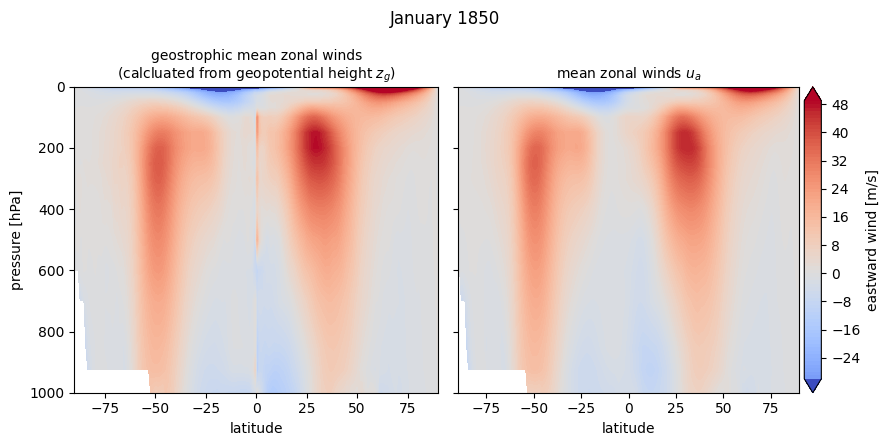

In [16]:
# specify constants
Omega =  2 * np.pi / 24 / 60 / 60  # 1/s,  rotation rate of earth
R_E = 6371e3  # m, radius of earth
g = 9.81  # m / s^2, gravitational acceleration on earth

# calculate the coriolis frequency for each latitude
f = 2 * Omega * np.sin(np.deg2rad(ds5.lat))

# calculate y coordinates from each latitude
y = R_E * np.deg2rad(ds5.lat)

# specify the first month (January 1850)
jan1850 = 0

# cacluate dz_g / dy using npumpy.gradient()
dzgdy = np.gradient(ds5.zg[jan1850], y, axis=1)

# expand the dimensions of f to match the ones of dzgdy
f_expand = np.expand_dims(f, axis=(2, 0))

# calculate the geostrophic eastward wind using the equation u = g / f (d z_g / d y) derived above
u_geostrophic = - g / f_expand * dzgdy

# take the mean across the longitude axis to get mean zonal eastward wind
u_geostrophic_mean_zonal = np.nanmean(u_geostrophic, axis=2)

# make the figure
fig, axs = plt.subplots(figsize=[9,4.5], ncols=2, sharey=True)
levels = np.arange(-30., 50., 1.)  # levels for contour plots
cmap = plt.cm.coolwarm  # color map
ylim = [1000., 0.]  # limit for y-axes

# plot the mean zonal geostrophic winds we calculated
ax = axs[0]
contour = ax.contourf(ds5.lat, ds5.plev / 100., u_geostrophic_mean_zonal, levels=levels, cmap=cmap, extend='both', norm=colors.CenteredNorm())
ax.set_xlabel("latitude")
ax.set_ylabel("pressure [hPa]")
ax.set_title("geostrophic mean zonal winds\n(calcluated from geopotential height $z_g$)", fontsize=10)

# plot the mean zonal eastward winds provided by the model
ax = axs[1]
contour = ax.contourf(ds4.lat, ds4.plev / 100., ds4.ua[jan1850].mean(dim='lon'), levels=levels, cmap=cmap, extend='both', norm=colors.CenteredNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cs = fig.colorbar(contour, cax=cax, orientation='vertical')
cs.set_label("eastward wind [m/s]")
ax.set_xlabel("latitude")
ax.set_title("mean zonal winds $u_a$", fontsize=10)
ax.set_ylim(ylim)

fig.suptitle('January 1850')
fig.tight_layout()

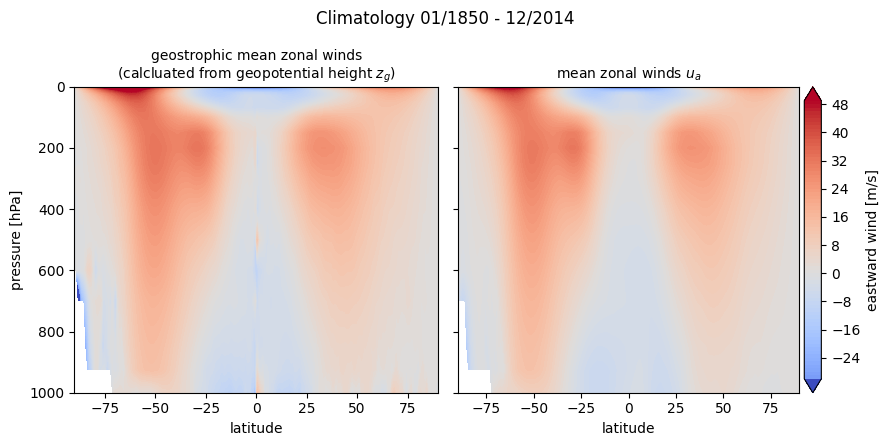

In [17]:
# specify constants
Omega =  2 * np.pi / 24 / 60 / 60  # 1/s,  rotation rate of earth
R_E = 6371e3  # m, radius of earth
g = 9.81  # m / s^2, gravitational acceleration on earth

# calculate the coriolis frequency for each latitude
f = 2 * Omega * np.sin(np.deg2rad(ds5.lat))

# calculate y coordinates from each latitude
y = R_E * np.deg2rad(ds5.lat)

# cacluate dz_g / dy using npumpy.gradient()
dzgdy = np.gradient(ds5.zg.mean(dim='time'), y, axis=1)

# expand the dimensions of f to match the ones of dzgdy
f_expand = np.expand_dims(f, axis=(2, 0))

# calculate the geostrophic eastward wind using the equation u = g / f (d z_g / d y) derived above
u_geostrophic = - g / f_expand * dzgdy

# take the mean across the longitude axis to get mean zonal eastward wind
u_geostrophic_mean_zonal = np.nanmean(u_geostrophic, axis=2)

# make the figure
fig, axs = plt.subplots(figsize=[9,4.5], ncols=2, sharey=True)
levels = np.arange(-30., 50., 1.)  # levels for contour plots
cmap = plt.cm.coolwarm  # color map
ylim = [1000., 0.]  # limit for y-axes

# plot the mean zonal geostrophic winds we calculated
ax = axs[0]
contour = ax.contourf(ds5.lat, ds5.plev / 100., u_geostrophic_mean_zonal, levels=levels, cmap=cmap, extend='both', norm=colors.CenteredNorm())
ax.set_xlabel("latitude")
ax.set_ylabel("pressure [hPa]")
ax.set_title("geostrophic mean zonal winds\n(calcluated from geopotential height $z_g$)", fontsize=10)

# plot the mean zonal eastward winds provided by the model
ax = axs[1]
contour = ax.contourf(ds4.lat, ds4.plev / 100., ds4.ua.mean(dim=['lon', 'time']), levels=levels, cmap=cmap, extend='both', norm=colors.CenteredNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cs = fig.colorbar(contour, cax=cax, orientation='vertical')
cs.set_label("eastward wind [m/s]")
ax.set_xlabel("latitude")
ax.set_title("mean zonal winds $u_a$", fontsize=10)
ax.set_ylim(ylim)
time_start = '%02d/%d' % (np.ceil(ds4.time[0]/365 % 1 * 12), ds4.time[0]/365+1)
time_end = '%02d/%d' % (np.ceil(ds4.time[-1]/365 % 1 * 12), ds4.time[-1]/365+1)
fig.suptitle('Climatology %s - %s' % (time_start, time_end))
fig.tight_layout()

The mean zonal geostrophic winds are very similar to the total mean zonal winds, except for very close to the equator. Addiditonally there are some differences near the surface. This means that the geostrophic approximation generally holds quite well, especially at higher altitudes in the atmosphere and away from the equator. The resons for this are the following:

- Near the equator, the geostrophic approximation does not hold very well because the rossby number $\mathrm{Ro} = \frac{U}{Lf}$ becomes $\gg1$ as $f \rightarrow 0$.
- Near the Earth's surface, the geostrophic approximation also does not hold as well because frictional forces become more important and topography can force changes in wind velocity.

---
#  <font color='red'> Question 13 </font>
<font color='red'>Take a photo of a cloud and speculate on the atmospheric processes which might have generated it.</font>

<font color='red'>*Hint: You can include an image from the internet in your text answer using the following Markdown code. Make sure the image is publicly accessible.* \
`![alternative text description](https://www.domain.com/link/to/your/image.jpg)`</font>

## <font color='green'> Grading Rubric </font>
<font color='green'>$2$ points total (average: $1.73$)</font>
- <font color='green'> **0.5 pts:** Provided a **photo**. ($17 / 20$ students) </font>
- <font color='green'> **0.5 pts:** Took a photo **of their own**. ($16 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Correct **description** of what is shown. ($18 / 20$ students)</font>
- <font color='green'> **0.5 pts:** Speculated about actual atmospheric **processes**. ($18 / 20$ students) </font>

**Why you shouldn't book a flight with a short afternoon connection in Denver in the late summer...**

The sun's been roasting the city, and the atmosphere decides to throw a tantrum. Warm, moist air rises, clashes with cooler air, and bam! You've got thunderstorm ingredients. Add the uplift of the Rocky Mountains into the mix, and you've got a recipe for chaos. Lots of CAPE for dinner tonight.


![thunderstorm clouds seen from the airplane](https://raw.githubusercontent.com/fliphilipp/images/main/PXL_20210723_232906865.jpg)